In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
df=pd.read_csv('Fraud_Analysis_Dataset.csv')

In [4]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1


In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [8]:
df['isFraud'].value_counts()

isFraud
0    10000
1     1142
Name: count, dtype: int64

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [10]:
df.shape

(11142, 10)

In [11]:
round(df['isFraud'].value_counts()[1]/df.shape[0]*100,2)

10.25

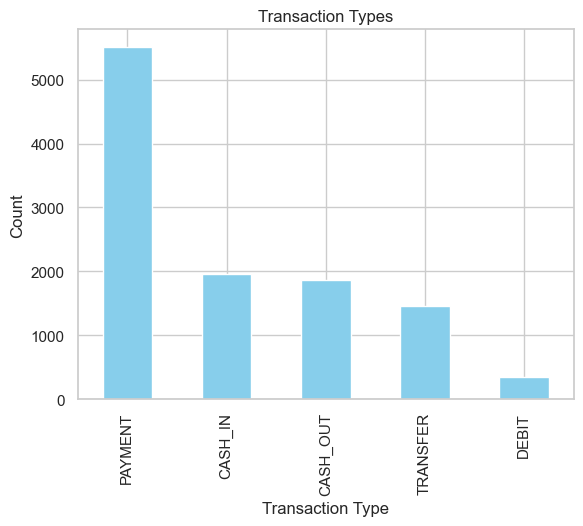

In [12]:
df['type'].value_counts().plot(kind="bar",title="Transaction Types", color="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

In [108]:
fraud_by_type_12=df.groupby('type')['isFraud'].sum().sort_values(ascending=False)
fraud_by_type_12

type
CASH_OUT    578
TRANSFER    564
CASH_IN       0
DEBIT         0
PAYMENT       0
Name: isFraud, dtype: int64

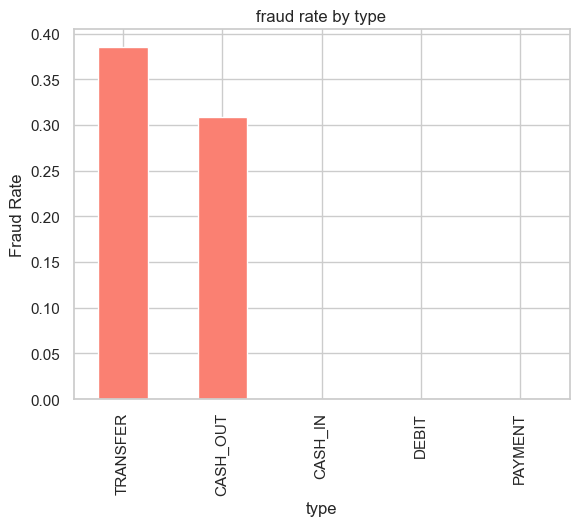

In [13]:
fraud_by_type=df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar',title='fraud rate by type',color='salmon')
plt.ylabel('Fraud Rate')
plt.show()

In [14]:
fraud_by_type

type
TRANSFER    0.385246
CASH_OUT    0.308926
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

In [15]:
df['amount'].describe().astype(int)

count       11142
mean       213191
std        760065
min             2
25%          4946
50%         16761
75%        154336
max      10000000
Name: amount, dtype: int32

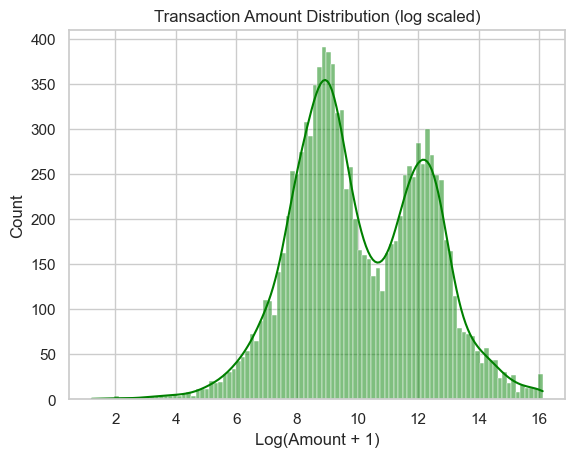

In [16]:
sns.histplot(np.log1p(df['amount']),bins=100,kde=True, color='green')
plt.title('Transaction Amount Distribution (log scaled)')
plt.xlabel('Log(Amount + 1)')
plt.show()

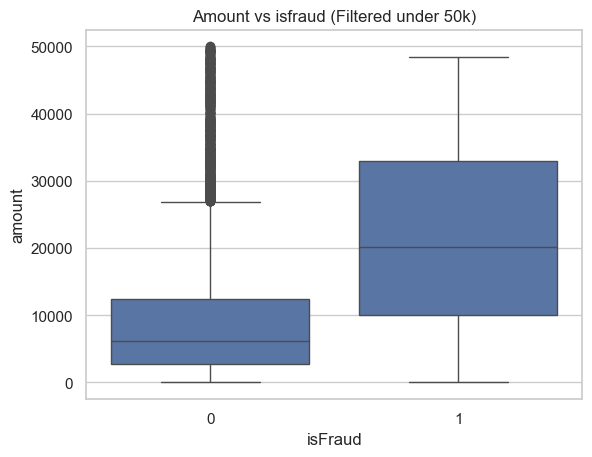

In [17]:
#relationship between frand and amount
sns.boxplot(data=df[df['amount']<50000],x='isFraud',y='amount')
plt.title('Amount vs isfraud (Filtered under 50k)')
plt.show()

In [18]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [19]:
df['balanceDiffOrig']=df['oldbalanceOrg']-df['newbalanceOrig']
df['balanceDiffDest']=df['newbalanceDest']-df['oldbalanceDest']

In [20]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [21]:
(df['balanceDiffOrig']<0).sum()

1921

In [22]:
(df['balanceDiffDest']<0).sum()

2201

In [23]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,181.0,0.0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0


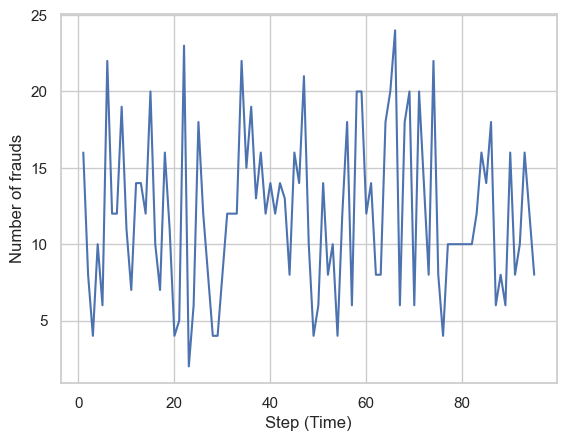

In [24]:
frauds_per_step=df[df['isFraud']==1]['step'].value_counts().sort_index()
plt.plot(frauds_per_step.index,frauds_per_step.values,label='Frauds per step')
plt.xlabel('Step (Time)')
plt.ylabel('Number of frauds')
plt.grid(True)
plt.show()

In [25]:
df.drop(columns='step',inplace=True)

In [26]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,181.0,0.0
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0
2,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,2806.0,0.0
3,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,2806.0,-26202.0
4,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,20128.0,0.0


In [27]:
#customers
top_senders=df['nameOrig'].value_counts().head(10)

In [28]:
top_senders

nameOrig
C1305486145    1
C479078480     1
C1602363550    1
C1365013293    1
C1525186016    1
C1364051444    1
C2049210129    1
C1225830367    1
C1984803180    1
C1170952967    1
Name: count, dtype: int64

In [29]:
top_receivers=df['nameDest'].value_counts().head(10)

In [30]:
top_receivers

nameDest
C985934102     62
C1590550415    52
C1286084959    50
C1899073220    44
C977993101     44
C451111351     43
C1782113663    43
C2083562754    41
C1789550256    40
C1816757085    40
Name: count, dtype: int64

In [31]:
fraud_users=df[df['isFraud']==1]['nameOrig'].value_counts().head(10)

In [32]:
fraud_users

nameOrig
C1305486145    1
C1776675634    1
C289101217     1
C1116093088    1
C1795901064    1
C1422133318    1
C1694539503    1
C1198248537    1
C1837436553    1
C1422380255    1
Name: count, dtype: int64

In [33]:
fraud_types=df[df['type'].isin(['TRANSFER','CASH_OUT'])]

In [34]:
fraud_types

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,181.00,0.00
1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,181.00,-21182.00
2,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,2806.00,0.00
3,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,2806.00,-26202.00
4,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,20128.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
11134,TRANSFER,2861134.92,C1326904973,0.00,0.00,C991505714,5352935.74,14000000.00,0,0.00,8647064.26
11135,TRANSFER,80485.60,C1369223613,0.00,0.00,C465257140,1078685.56,1761413.49,0,0.00,682727.93
11136,TRANSFER,19991.02,C1020193304,0.00,0.00,C1915624447,21586.00,17795.02,0,0.00,-3790.98
11138,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0,298799.54,4566008.83


In [35]:
fraud_types['type'].value_counts()

type
CASH_OUT    1871
TRANSFER    1464
Name: count, dtype: int64

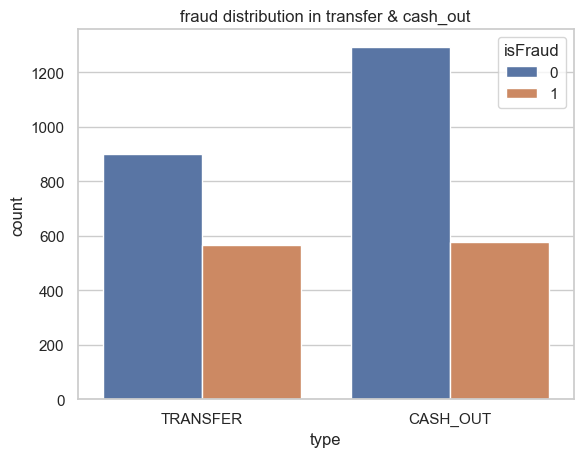

In [36]:
sns.countplot(data=fraud_types,x='type',hue='isFraud')
plt.title('fraud distribution in transfer & cash_out')
plt.show()

In [37]:
#correlation
corr=df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']].corr()

In [38]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,0.323943,-0.007816,0.094117,0.227413,0.435490
oldbalanceOrg,0.323943,1.000000,0.937024,0.207628,0.209787,0.046445
newbalanceOrig,-0.007816,0.937024,1.000000,0.234148,0.190314,-0.127912
oldbalanceDest,0.094117,0.207628,0.234148,1.000000,0.928831,-0.056575
newbalanceDest,0.227413,0.209787,0.190314,0.928831,1.000000,-0.002864
isFraud,0.435490,0.046445,-0.127912,-0.056575,-0.002864,1.000000


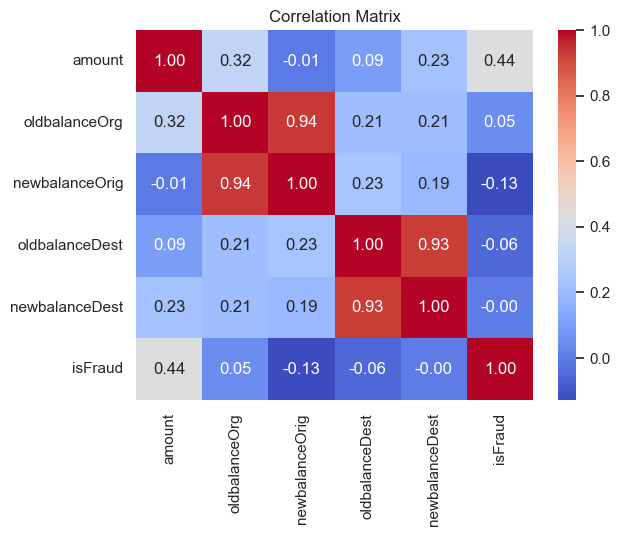

In [39]:
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [40]:
zero_after_transfer=df[(df['oldbalanceOrg']>0) & (df['newbalanceDest']==0)&(df['type'].isin(['TRANSFER','CASH_OUT']))]

In [41]:
len(zero_after_transfer)

596

In [42]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,181.0,0.0
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0
2,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,2806.0,0.0
3,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,2806.0,-26202.0
4,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,20128.0,0.0


In [43]:
df['isFraud'].value_counts()

isFraud
0    10000
1     1142
Name: count, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import time

In [45]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,181.0,0.0
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0
2,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,2806.0,0.0
3,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,2806.0,-26202.0
4,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,20128.0,0.0


In [46]:
df_model=df.drop(['nameOrig','nameDest'],axis=1)

In [47]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,181.0,0.0
1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,181.0,-21182.0
2,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,2806.0,0.0
3,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,2806.0,-26202.0
4,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,20128.0,0.0


In [48]:
categorical=['type']
numeric=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [49]:
numeric

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

In [50]:
X=df_model.drop('isFraud',axis=1)
y=df_model['isFraud']

In [51]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11137    0
11138    0
11139    0
11140    0
11141    0
Name: isFraud, Length: 11142, dtype: int64

In [52]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [53]:
preprocessor=ColumnTransformer(
    transformers=[('num',StandardScaler(),numeric),
                  ('cat',OneHotEncoder(drop='first'),categorical)
                 ],
    remainder='drop'
)

In [54]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['amount', 'oldbalanceOrg', 'newbalanceOrig',
                                  'oldbalanceDest', 'newbalanceDest']),
                                ('cat', OneHotEncoder(drop='first'), ['type'])])

In [55]:
transformed = preprocessor.fit_transform(df)

In [56]:
# Get feature names
num_features = numeric
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical)

# Combine names
feature_names = list(num_features) + list(cat_features)
print(feature_names)


['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']


In [57]:
transformed_df = pd.DataFrame(
    transformed,
    columns=feature_names
)

print(transformed_df)


         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     -0.280266      -0.431160       -0.394754       -0.341509   
1     -0.280266      -0.431160       -0.394754       -0.333366   
2     -0.276812      -0.429935       -0.394754       -0.341509   
3     -0.276812      -0.429935       -0.394754       -0.331436   
4     -0.254021      -0.421852       -0.394754       -0.341509   
...         ...            ...             ...             ...   
11137 -0.272091      -0.229143       -0.190577       -0.157590   
11138  0.112638      -0.232127       -0.333557       -0.070734   
11139  0.276263      -0.371563       -0.394754       -0.106823   
11140 -0.279064      -0.424750       -0.388618       -0.341509   
11141 -0.268352      -0.412595       -0.380051       -0.341509   

       newbalanceDest  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0           -0.369918            0.0         0.0           0.0            1.0  
1           -0.369918            1.0         0.

In [58]:
# Define all classifiers with their parameters
classifiers = {
    'LogisticRegression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

In [59]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import time
import matplotlib.pyplot as plt
import numpy as np

# Define all classifiers with their parameters
# Enable probability estimation for SVC to get ROC-AUC
classifiers = {
    'LogisticRegression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(class_weight='balanced', random_state=42, probability=True),  # Added probability=True
    'KNeighbors': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(class_weight='balanced', random_state=42),
    'GaussianNB': GaussianNB()
}




In [105]:
pred_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
pred_df.to_csv("predictions.csv", index=False)

In [60]:
# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print(f"{'='*50}")
    
    start_time = time.time()
    
    pipeline = Pipeline([
        ('prep', preprocessor),
        ('clf', clf)
    ])
    
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    
    # Get probability predictions for ROC-AUC
    y_pred_proba = None
    try:
        y_pred_proba = pipeline.predict_proba(x_test)[:, 1]  # Probability of positive class
    except:
        print(f"{name} does not support probability predictions")
    
    training_time = time.time() - start_time
    
    # Store results
    results[name] = {
        'pipeline': pipeline,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'time': training_time
    }
    
    # Calculate ROC-AUC if probabilities are available
    roc_auc = None
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Training time: {training_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    if roc_auc is not None:
        print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Training LogisticRegression...
Training time: 0.11 seconds

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3000
           1       0.43      0.99      0.60       343

    accuracy                           0.86      3343
   macro avg       0.71      0.92      0.76      3343
weighted avg       0.94      0.86      0.89      3343

ROC-AUC Score: 0.9868
Confusion Matrix:
[[2551  449]
 [   4  339]]

Training RandomForest...
Training time: 1.51 seconds

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       0.99      0.97      0.98       343

    accuracy                           1.00      3343
   macro avg       0.99      0.99      0.99      3343
weighted avg       1.00      1.00      1.00      3343

ROC-AUC Score: 0.9965
Confusion Matrix:
[[2997    3]
 [   9  334]]

Training GradientBoosting...
Training time: 2.72 

In [91]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

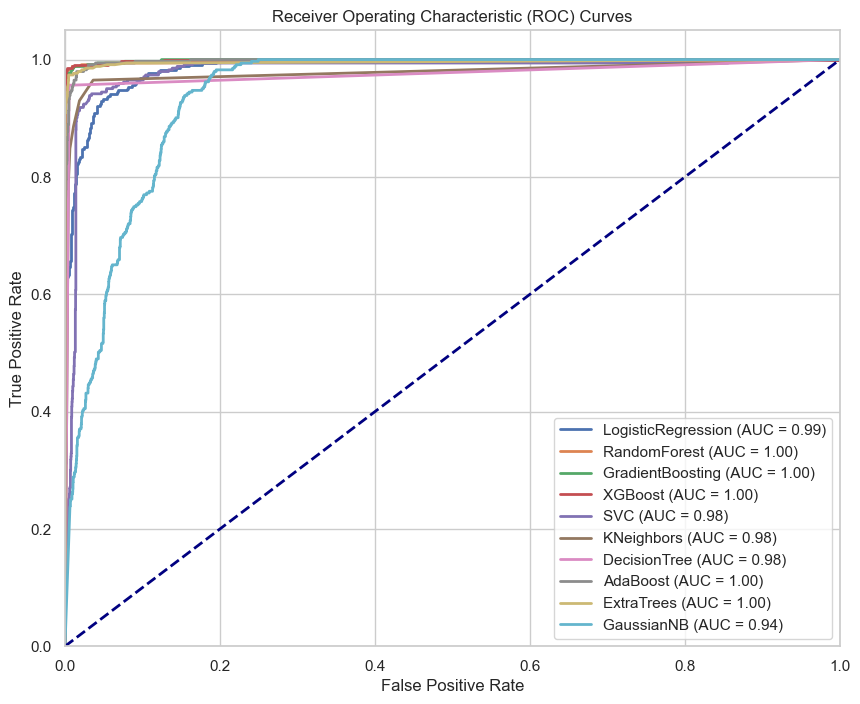

In [61]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for name, result in results.items():
    if result['y_pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()



In [62]:
# Compare model performance
print(f"\n{'='*80}")
print("MODEL COMPARISON SUMMARY")
print(f"{'='*80}")

print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'ROC-AUC':<10} {'Time (s)':<10}")
print(f"{'-'*90}")

for name, result in results.items():
    report = classification_report(y_test, result['y_pred'], output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    
    # Get ROC-AUC if available
    roc_auc = 'N/A'
    if result['y_pred_proba'] is not None:
        roc_auc = f"{roc_auc_score(y_test, result['y_pred_proba']):.4f}"
    
    print(f"{name:<20} {accuracy:<10.4f} {precision:<10.4f} {recall:<10.4f} {f1:<10.4f} {roc_auc:<10} {result['time']:<10.2f}")




MODEL COMPARISON SUMMARY
Model                Accuracy   Precision  Recall     F1-Score   ROC-AUC    Time (s)  
------------------------------------------------------------------------------------------
LogisticRegression   0.8645     0.9401     0.8645     0.8857     0.9868     0.11      
RandomForest         0.9964     0.9964     0.9964     0.9964     0.9965     1.51      
GradientBoosting     0.9946     0.9946     0.9946     0.9946     0.9990     2.72      
XGBoost              0.9967     0.9967     0.9967     0.9967     0.9991     0.25      
SVC                  0.8753     0.9415     0.8753     0.8939     0.9806     9.19      
KNeighbors           0.9785     0.9783     0.9785     0.9784     0.9779     0.56      
DecisionTree         0.9907     0.9907     0.9907     0.9907     0.9755     0.06      
AdaBoost             0.9862     0.9861     0.9862     0.9861     0.9978     0.75      
ExtraTrees           0.9919     0.9919     0.9919     0.9919     0.9959     0.74      
GaussianNB   

In [63]:
# Find the best model based on F1-score
best_model_f1 = max(results.items(), 
                   key=lambda x: classification_report(y_test, x[1]['y_pred'], output_dict=True)['weighted avg']['f1-score'])[0]



In [64]:
# Find the best model based on ROC-AUC (if available)
models_with_auc = {name: result for name, result in results.items() if result['y_pred_proba'] is not None}
if models_with_auc:
    best_model_auc = max(models_with_auc.items(), 
                        key=lambda x: roc_auc_score(y_test, x[1]['y_pred_proba']))[0]
    print(f"\nBest model by F1-Score: {best_model_f1}")
    print(f"Best model by ROC-AUC: {best_model_auc}")
else:
    print(f"\nBest model: {best_model_f1}")

# Additional analysis: Show ROC-AUC for top 3 models
print(f"\n{'='*60}")
print("TOP MODELS BY ROC-AUC")
print(f"{'='*60}")




Best model by F1-Score: XGBoost
Best model by ROC-AUC: XGBoost

TOP MODELS BY ROC-AUC


In [65]:
# Sort models by ROC-AUC (descending)
models_sorted_by_auc = sorted([(name, result) for name, result in results.items() if result['y_pred_proba'] is not None],
                             key=lambda x: roc_auc_score(y_test, x[1]['y_pred_proba']), 
                             reverse=True)

for i, (name, result) in enumerate(models_sorted_by_auc[:3], 1):
    auc_score = roc_auc_score(y_test, result['y_pred_proba'])
    print(f"{i}. {name}: ROC-AUC = {auc_score:.4f}")

1. XGBoost: ROC-AUC = 0.9991
2. GradientBoosting: ROC-AUC = 0.9990
3. AdaBoost: ROC-AUC = 0.9978


In [75]:
import joblib
joblib.dump(pipeline,'fraud_detection_pipeline.pkl')

['fraud_detection_pipeline.pkl']

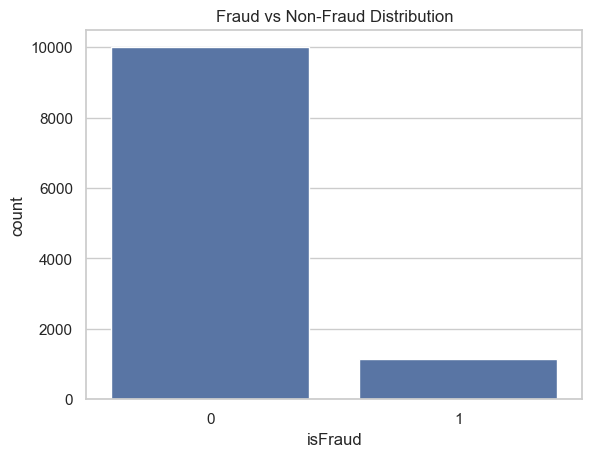

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="isFraud", data=df)  # Class: 0=Normal, 1=Fraud
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


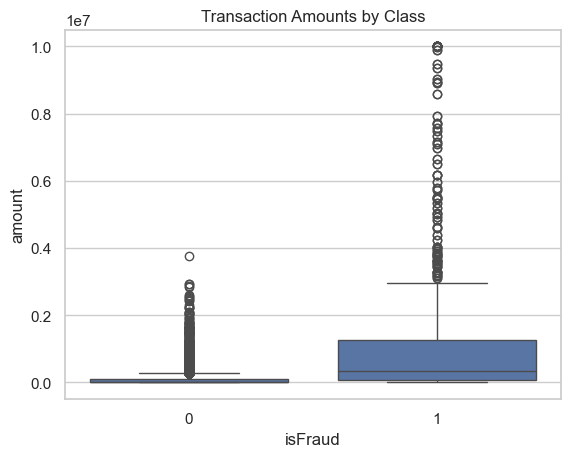

In [79]:
sns.boxplot(x="isFraud", y="amount", data=df)
plt.title("Transaction Amounts by Class")
plt.show()

In [104]:
fraud_sum = df[df['isFraud'] == 1]['amount'].sum()
nonfraud_sum = df[df['isFraud'] == 0]['amount'].sum()
sum_amount=df['amount'].sum()
fdtran = int(fraud_sum / nonfraud_sum)
added=fraud_sum+nonfraud_sum
print(added)
print(fraud_sum)
print(sum_amount)
print(nonfraud_sum)
print(fdtran)

2375379526.8100004
1361982240.43
2375379526.8100004
1013397286.3800001
1


In [96]:
fraud_by_step = df1[df1["isFraud"] == 1].groupby("step")["amount"].sum()
print(fraud_by_step.head())


step
1     3740247.01
2     4186592.48
3       66832.74
4    26400274.90
5      381841.54
Name: amount, dtype: float64


In [106]:
fraud_by_type_i = df.groupby("type")["isFraud"].mean()
print(fraud_by_type)


type
TRANSFER    0.385246
CASH_OUT    0.308926
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64
